In [368]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [369]:
df_fashion = pd.read_csv("fashion-mnist.csv")

A partir del dataframe original, construir un nuevo dataframe que contenga sólo al subconjunto de imágenes correspondientes a las remeras y a los pantalones

In [370]:
df_pant_rem = df_fashion[(df_fashion['label']==0) | (df_fashion['label']==1)]

In [211]:
# Vemos que esta balanceado
df_pant_rem['label'].value_counts()

0    6000
1    6000
Name: label, dtype: int64

# MODELADO

In [212]:
from sklearn.model_selection import train_test_split

X = df_pant_rem.drop('label', axis=1)
y = df_pant_rem['label']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2)

Sobre este subconjunto de datos, analizar cuántas muestras se tienen y determinar si está balanceado en función de la clase a predecir.

In [213]:
y_train.value_counts()

1    4849
0    4751
Name: label, dtype: int64

Vemos que los conjuntos de datos estan balanceados.

Ajustar un modelo de KNN considerando pocos atributos, por ejemplo 3. Probar con distintos conjuntos de 3 atributos y comparar resultados. Analizar utilizando otras cantidades de atributos.

In [214]:
from sklearn.neighbors import KNeighborsClassifier
import random

In [215]:
def tres_atributos_randoms(cantIter, k):   
    resultados = []
    for i in range(cantIter):
        random.seed(i)
        pixel1 = 'pixel'+str(random.randint(1,784))
        pixel2 = 'pixel'+str(random.randint(1,784))
        pixel3 = 'pixel'+str(random.randint(1,784))
        X_3rand_train = X_train[[pixel1, pixel2, pixel3]]
        X_3rand_test = X_test[[pixel1,pixel2, pixel3]]
        neigh = KNeighborsClassifier(k)
        neigh.fit(X_3rand_train, y_train)
        resultados.append(round(neigh.score(X_3rand_test, y_test),2))
    return resultados

In [216]:
# Probamos con valores de 2 a 10

promedios3 = []
for i in range(2,21):
    print('Con k= ',i)
    print('Valores: ', tres_atributos_randoms(10, i))
    print('Promedio: ', sum(tres_atributos_randoms(10, i))/10)
    promedios3.append(sum(tres_atributos_randoms(10, i))/10)

Con k=  2
Valores:  [0.73, 0.52, 0.54, 0.68, 0.86, 0.67, 0.52, 0.71, 0.86, 0.65]
Promedio:  0.674
Con k=  3
Valores:  [0.76, 0.64, 0.59, 0.68, 0.9, 0.71, 0.86, 0.76, 0.88, 0.67]
Promedio:  0.7449999999999999
Con k=  4
Valores:  [0.75, 0.64, 0.61, 0.7, 0.89, 0.7, 0.87, 0.74, 0.88, 0.66]
Promedio:  0.744
Con k=  5
Valores:  [0.79, 0.64, 0.61, 0.69, 0.9, 0.71, 0.86, 0.76, 0.89, 0.67]
Promedio:  0.752
Con k=  6
Valores:  [0.77, 0.65, 0.62, 0.71, 0.9, 0.7, 0.87, 0.77, 0.89, 0.68]
Promedio:  0.756
Con k=  7
Valores:  [0.79, 0.64, 0.61, 0.71, 0.9, 0.72, 0.87, 0.77, 0.89, 0.69]
Promedio:  0.759
Con k=  8
Valores:  [0.78, 0.65, 0.62, 0.71, 0.9, 0.71, 0.87, 0.78, 0.89, 0.69]
Promedio:  0.76
Con k=  9
Valores:  [0.79, 0.64, 0.62, 0.71, 0.91, 0.72, 0.87, 0.78, 0.89, 0.69]
Promedio:  0.7620000000000001
Con k=  10
Valores:  [0.78, 0.65, 0.62, 0.72, 0.9, 0.71, 0.87, 0.77, 0.89, 0.7]
Promedio:  0.7610000000000001
Con k=  11
Valores:  [0.8, 0.64, 0.63, 0.72, 0.91, 0.72, 0.87, 0.78, 0.89, 0.7]
Promedio:

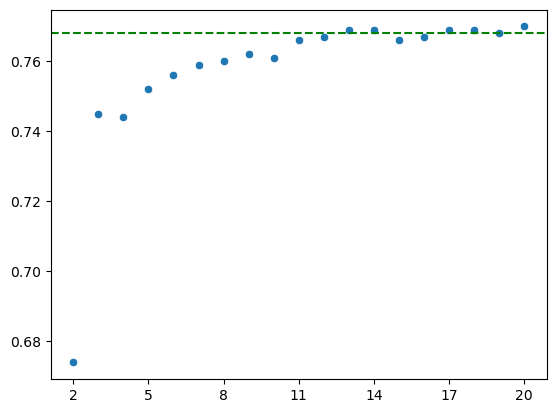

In [217]:
sns.scatterplot(x=np.arange(2,21), y=promedios3)
plt.xticks(np.arange(2,21, 3))
plt.axhline(y=0.768, color='green', linestyle='--', label="y = 3.7")
plt.show()

In [218]:
def cinco_atributos_random(cantIter, k):  
    resultados = []
    for i in range(cantIter):
        random.seed(i)
        pixel1 = 'pixel'+str(random.randint(1,784))
        pixel2 = 'pixel'+str(random.randint(1,784))
        pixel3 = 'pixel'+str(random.randint(1,784))
        pixel4 = 'pixel'+str(random.randint(1,784))
        pixel5 = 'pixel'+str(random.randint(1,784))
        X_3rand_train = X_train[[pixel1, pixel2, pixel3, pixel4, pixel5]]
        X_3rand_test = X_test[[pixel1,pixel2, pixel3, pixel4, pixel5]]
        neigh = KNeighborsClassifier(k)
        neigh.fit(X_3rand_train, y_train)
        resultados.append(round(neigh.score(X_3rand_test, y_test),2))
    return resultados

In [219]:
# Probamos con valores de 2 a 10

promedios5 = []
for i in range(2,21):
    print('Con k= ',i)
    print('Valores: ', cinco_atributos_random(10, i))
    print('Promedio: ', sum(cinco_atributos_random(10, i))/10)
    promedios5.append(sum(cinco_atributos_random(10, i))/10)

Con k=  2
Valores:  [0.77, 0.82, 0.85, 0.92, 0.88, 0.82, 0.82, 0.8, 0.88, 0.83]
Promedio:  0.8390000000000001
Con k=  3
Valores:  [0.81, 0.85, 0.9, 0.93, 0.91, 0.86, 0.84, 0.85, 0.89, 0.88]
Promedio:  0.8720000000000001
Con k=  4
Valores:  [0.81, 0.85, 0.89, 0.93, 0.91, 0.87, 0.85, 0.84, 0.9, 0.87]
Promedio:  0.8720000000000001
Con k=  5
Valores:  [0.82, 0.85, 0.91, 0.94, 0.91, 0.88, 0.85, 0.85, 0.9, 0.89]
Promedio:  0.8799999999999999
Con k=  6
Valores:  [0.82, 0.86, 0.9, 0.94, 0.91, 0.87, 0.85, 0.85, 0.9, 0.89]
Promedio:  0.8789999999999999
Con k=  7
Valores:  [0.83, 0.86, 0.9, 0.94, 0.92, 0.87, 0.85, 0.85, 0.9, 0.9]
Promedio:  0.882
Con k=  8
Valores:  [0.82, 0.86, 0.9, 0.93, 0.92, 0.87, 0.85, 0.85, 0.91, 0.89]
Promedio:  0.8800000000000001
Con k=  9
Valores:  [0.83, 0.85, 0.91, 0.94, 0.92, 0.87, 0.85, 0.85, 0.9, 0.9]
Promedio:  0.882
Con k=  10
Valores:  [0.83, 0.86, 0.91, 0.94, 0.92, 0.87, 0.85, 0.85, 0.91, 0.89]
Promedio:  0.883
Con k=  11
Valores:  [0.83, 0.85, 0.91, 0.94, 0.91,

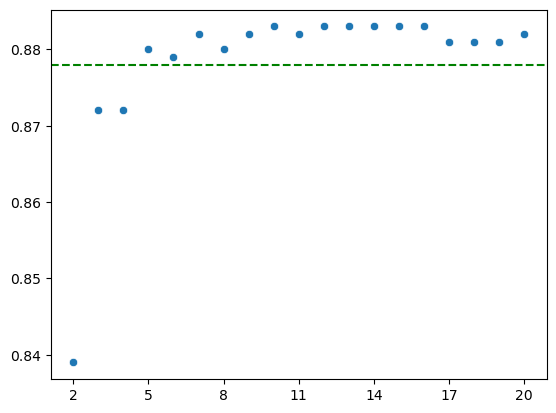

In [220]:
sns.scatterplot(x=np.arange(2,21), y=promedios5)
plt.xticks(np.arange(2,21, 3))
plt.axhline(y=0.878, color='green', linestyle='--', label="y = 3.7")
plt.show()

Comparar modelos de KNN utilizando distintos atributos y distintos valores de k (vecinos). Para el análisis de los resultados, tener en cuenta las medidas de evaluación (por ejemplo, la exactitud) y la cantidad de atributos.

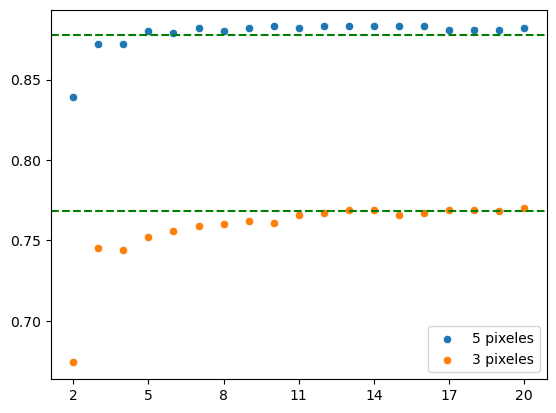

In [221]:
sns.scatterplot(x=np.arange(2,21), y=promedios5, label='5 pixeles')
sns.scatterplot(x=np.arange(2,21), y=promedios3, label='3 pixeles')
plt.xticks(np.arange(2,21, 3))
plt.axhline(y=0.768, color='green', linestyle='--', label="y = 3.7")
plt.axhline(y=0.878, color='green', linestyle='--', label="y = 3.7")
plt.show()

Veamos dada una imagen random que predice nuestro modelo.

In [222]:
neigh = KNeighborsClassifier(10) # k=10 ya que en el grafico anterior vemos que a partir de 10 no suele variar mucho la performance.
neigh.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

El valor predecido es: Pantalon


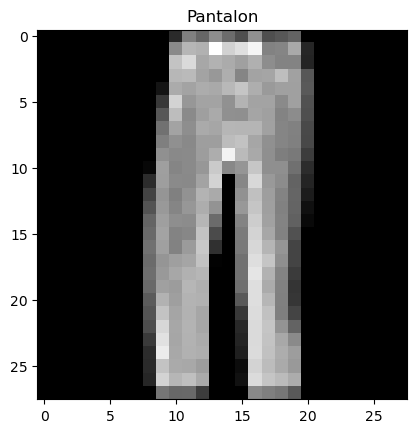

In [223]:
indice_random = np.random.randint(1,9600)
imagen_rand = X_train.iloc[indice_random]
valor_predicho = neigh.predict([imagen_rand])
valor_real = y_train.iloc[indice_random]
imagen_predicha = 'Remera' if valor_predicho == 0 else 'Pantalon'
print(f'El valor predecido es: {imagen_predicha}')
plt.imshow(imagen_rand.values.reshape(28,28), cmap='gray', vmin=0, vmax=255) 
plt.title('Remera' if valor_real == 0 else 'Pantalon')
plt.show()

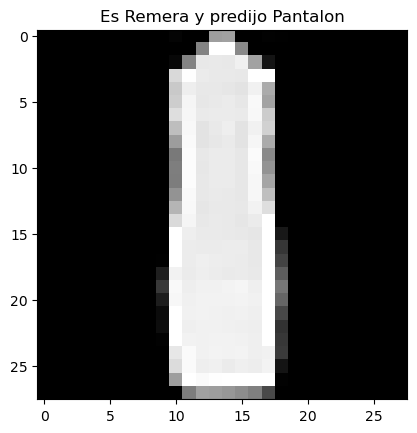

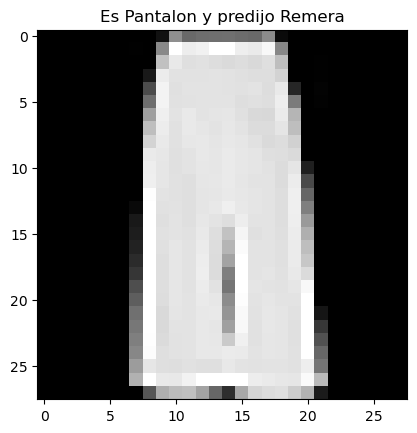

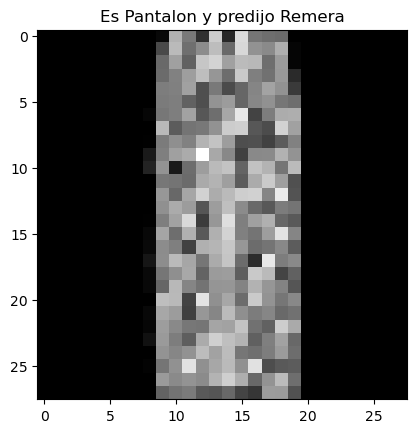

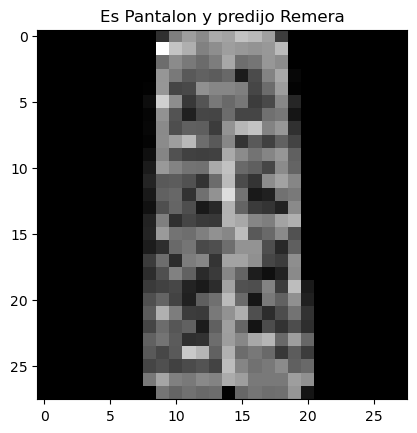

In [303]:
for i in range(100):
    indice_random = np.random.randint(1,2400)
    imagen_rand = X_test.iloc[indice_random]
    valor_predicho = neigh.predict([imagen_rand])
    valor_real = y_test.iloc[indice_random]
    if (valor_predicho != valor_real):
        plt.imshow(imagen_rand.values.reshape(28,28), cmap='gray', vmin=0, vmax=255) 
        etiqueta_predicha = 'Remera' if valor_predicho == 0 else 'Pantalon'
        etiqueta_real = 'Remera' if valor_real == 0 else 'Pantalon'
        plt.title('Es ' + etiqueta_real + ' y predijo ' + etiqueta_predicha)
        plt.show()

In [355]:
def exactitud(modelo, columnas):
    correctos = 0
    y_results = modelo.predict(X_test[columnas])
    for index in range(y_test.shape[0]):
        if y_results[index] == y_test.iloc[index]:
            correctos+=1
    return correctos/y_test.shape[0]

In [371]:
y_test.shape[0]

2400

In [329]:
exactitud(neigh, X_test.columns)

2370

Tomando como instancia positiva los pantalones, vemos cual es la precision y el recall de la clase:

In [276]:
def precision_recall(modelo):
    tp = fn = fp = 0
    y_results = modelo.predict(X_test)
    for index in range(1, y_test.shape[0]):
        if (y_test.iloc[index]==1 & y_results[index]==1): tp += 1
        if (y_test.iloc[index]==1 & y_results[index]==0): fn += 1
        if (y_test.iloc[index]==0 & y_results[index]==1): fp += 1
    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    return [precision, recall]

In [277]:
precision_recall(neigh)

[1.0, 0.4748839172646686]

Obtuvimos una precision del 100% lo que quiere decir que de todas las instancias que clasificamos como pantalones eran pantalones. Y el recall del 47% nos dice que de todos los pantalones el 47% los clasificamos como pantalones.

In [332]:
def knn_xvecinos(cant_atr, k_vecinos):
    random.seed(cant_atr)
    columnas = random.sample(list(X_train.columns), cant_atr)
    X_columnas_train = X_train[columnas]
    X_columnas_test = X_test[columnas]
    neigh_k = KNeighborsClassifier(k_vecinos)
    neigh_k.fit(X_columnas_train, y_train)
    return exactitud(neigh_k, columnas)

In [356]:
resultados = pd.DataFrame(columns=['cant_atr', 'k_vecinos', 'resultado'])
for cant_atributos in range(2, 785, 60):
    for k_vecinos in range(2,12):
        fila = {'cant_atr': cant_atributos, 'k_vecinos': k_vecinos, 'resultado': knn_xvecinos(cant_atributos, k_vecinos)}
        resultados = resultados.append(fila, ignore_index=True)
        print(cant_atributos, k_vecinos)

2 2
2 3
2 4
2 5
2 6
2 7
2 8
2 9
2 10
2 11
62 2
62 3
62 4
62 5
62 6
62 7
62 8
62 9
62 10
62 11
122 2
122 3
122 4
122 5
122 6
122 7
122 8
122 9
122 10
122 11
182 2
182 3
182 4
182 5
182 6
182 7
182 8
182 9
182 10
182 11
242 2
242 3
242 4
242 5
242 6
242 7
242 8
242 9
242 10
242 11
302 2
302 3
302 4
302 5
302 6
302 7
302 8
302 9
302 10
302 11
362 2
362 3
362 4
362 5
362 6
362 7
362 8
362 9
362 10
362 11
422 2
422 3
422 4
422 5
422 6
422 7
422 8
422 9
422 10
422 11
482 2
482 3
482 4
482 5
482 6
482 7
482 8
482 9
482 10
482 11
542 2
542 3
542 4
542 5
542 6
542 7
542 8
542 9
542 10
542 11
602 2
602 3
602 4
602 5
602 6
602 7
602 8
602 9
602 10
602 11
662 2
662 3
662 4
662 5
662 6
662 7
662 8
662 9
662 10
662 11
722 2
722 3
722 4
722 5
722 6
722 7
722 8
722 9
722 10
722 11
782 2
782 3
782 4
782 5
782 6
782 7
782 8
782 9
782 10
782 11


In [357]:
resultados

,cant_atr,k_vecinos,resultado
0,2.0,2.0,0.596250
1,2.0,3.0,0.587917
2,2.0,4.0,0.595417
3,2.0,5.0,0.577917
4,2.0,6.0,0.599583
...,...,...,...
135,782.0,7.0,0.988333
136,782.0,8.0,0.987500
137,782.0,9.0,0.988333
138,782.0,10.0,0.987500


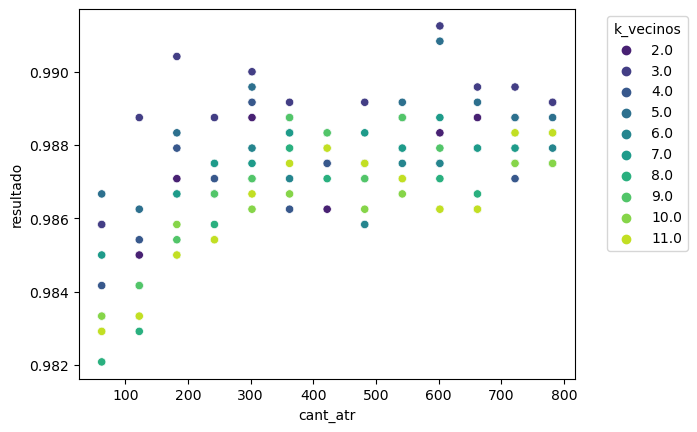

In [365]:
sns.scatterplot(data=resultados[resultados['cant_atr']>3], x='cant_atr', y='resultado', hue='k_vecinos', palette=sns.color_palette("viridis", len(range(2,12))))
plt.legend(title='k_vecinos', bbox_to_anchor=(1.05, 1), loc='upper left')

In [367]:
resultados.loc[resultados['resultado'].idxmax()]

cant_atr     602.00000
k_vecinos      3.00000
resultado      0.99125
Name: 101, dtype: float64